In [38]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.Understading the Data

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#It looks like there are quite a few missing values for age and cabin and a couple for embraked.
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#Look at categorical and numerical features separately 
cat_features = titanic[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]
num_features = titanic[['Age', 'SibSp', 'Parch', 'Fare']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015A8A239BE0>,
      dtype=object)

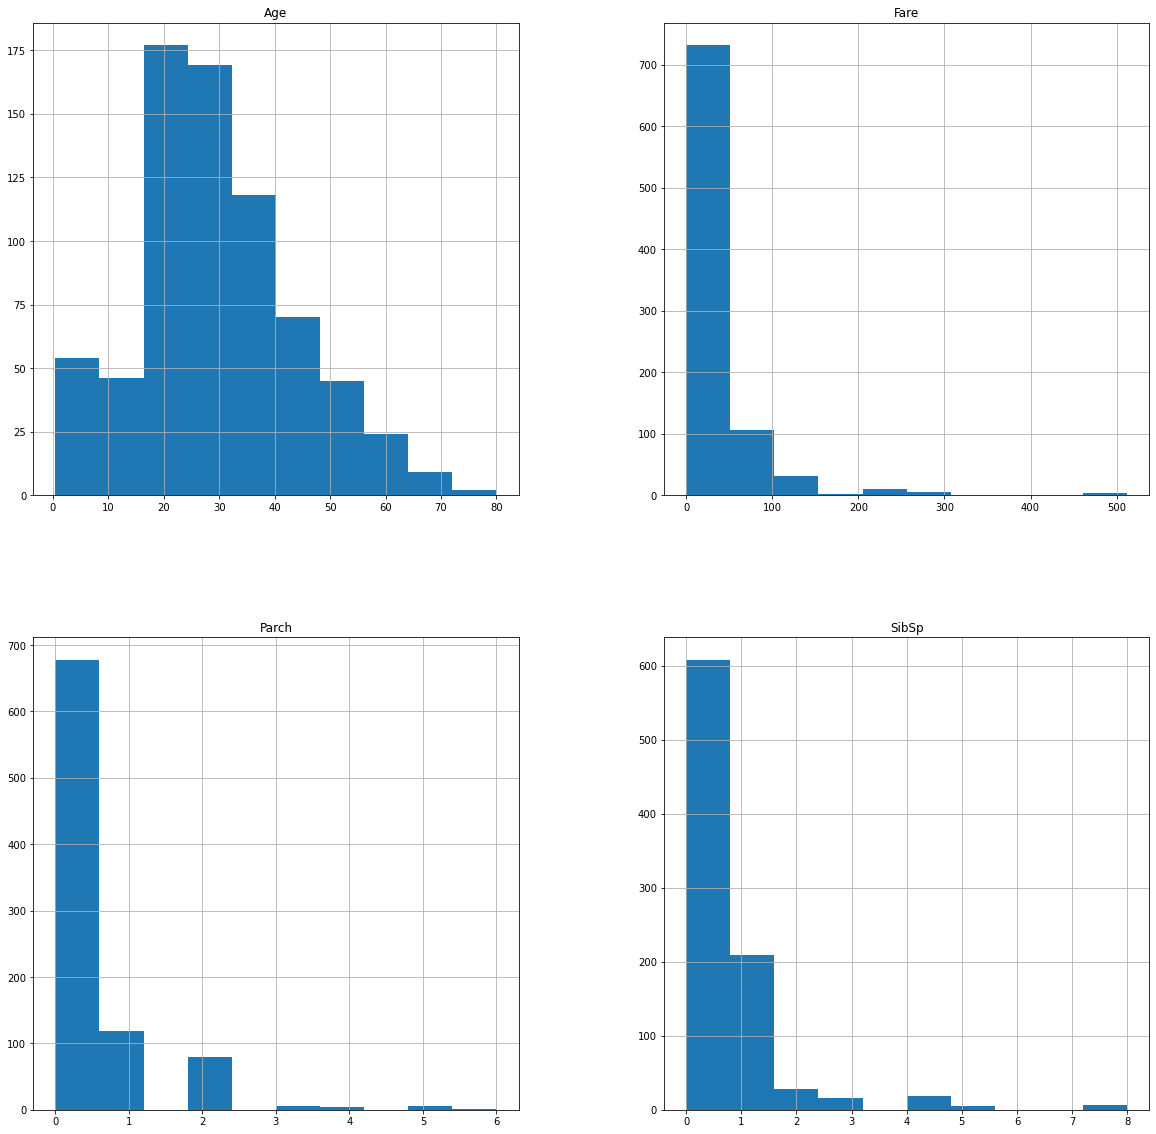

In [7]:
# Look at distribution of num
num_features.hist(figsize=(20,20))

In [8]:
#A lot of non-normal distributions that will need normalising. 
#Num features against the target 
pd.pivot_table(titanic, index='Survived', values=num_features)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [9]:
num_features.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


No large correlations. Largest is between parents/children and siblings/spouse. May be indicative of large families. 

In [10]:
#Now for cat features
cat_features

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S
1,1,1,female,PC 17599,C85,C
2,1,3,female,STON/O2. 3101282,NaN,S
3,1,1,female,113803,C123,S
4,0,3,male,373450,NaN,S
...,...,...,...,...,...,...
886,0,2,male,211536,NaN,S
887,1,1,female,112053,B42,S
888,0,3,female,W./C. 6607,NaN,S
889,1,1,male,111369,C148,C


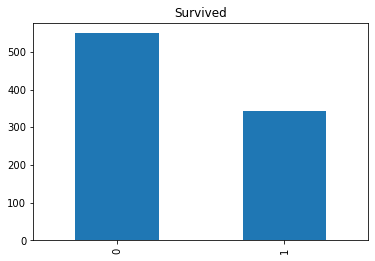

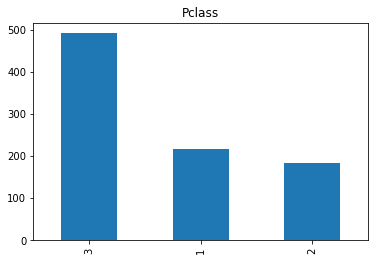

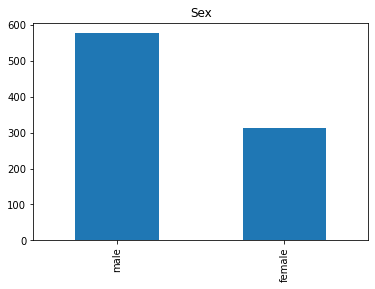

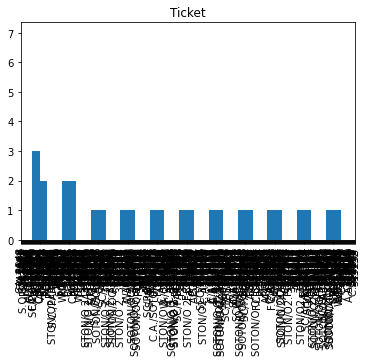

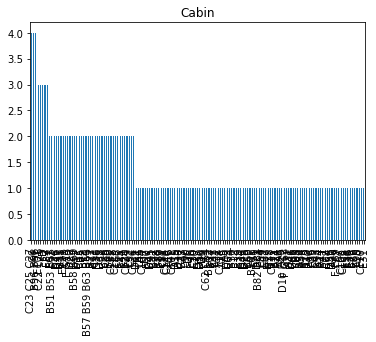

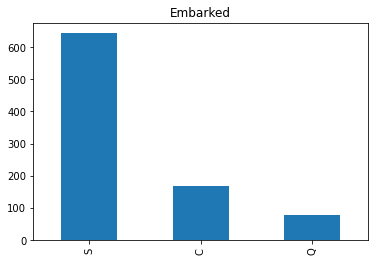

In [11]:
for cat in cat_features:
    titanic[cat].value_counts().plot.bar()
    plt.title(cat)
    plt.show()

More people survived than not. There are more third class and male passengers and majority left from Southampton.

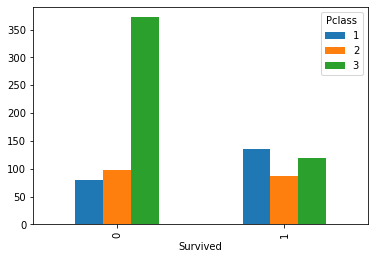

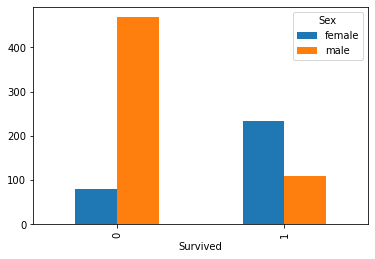

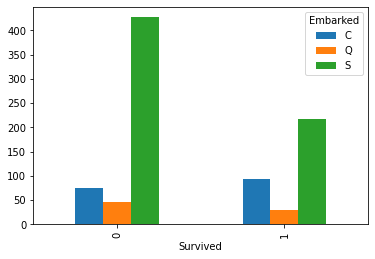

In [12]:
# Cat against target

for cat in ['Pclass', 'Sex', 'Embarked']:
    pd.pivot_table(titanic, index='Survived', columns=titanic[cat], values='Ticket',aggfunc='count').plot(kind='bar')

Large disparity in male/ female survival rates. Higher survival rates for 1st class passengers also noteworthy. All the features can engineered. 


## 2. Feature Engineering

In [13]:
#add interactionfeatures for sex and embarked
titanic['Sex_Embarked'] = titanic.Sex + '_' + titanic.Embarked

In [14]:
#add interactionfeatures for Pclass and sex
titanic['str_Pclass'] = titanic.Pclass.apply(lambda x: str(x))
titanic['Pclass_sex'] = titanic['str_Pclass'] + '_' + titanic['Sex']

In [15]:
#add interactionfeatures for Embarked and Pclass
titanic['Embarked_Pclass'] = titanic['Embarked'] + '_' + titanic['str_Pclass']

In [16]:
#create cabin letter and treat NA as category 
titanic['cabin_letter'] = titanic.Cabin.apply(lambda x: str(x)[0])

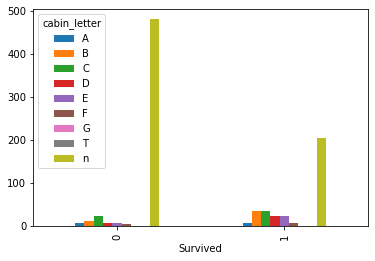

In [17]:
pd.pivot_table(titanic, index='Survived', columns='cabin_letter', values='Ticket',aggfunc='count').plot(kind='bar')

More survived for in cabins with letters and less for those without letters (n).

## 3.Preparing Data

In [18]:
#drop 2 NaN values from Embarked 
#impute mean for age
#encouding:'Sex', 'Embarked', 'Sex_Embarked', 'Pclass_sex', 'Embarked_Pclass', 'cabin_letter'
#normalise:fare LATER
#standardise:all 

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [20]:
#drop 2 NaN values from Embarked 
titanic.dropna(subset=['Embarked'], inplace=True)

In [21]:
#impute mean for age
titanic.Age = titanic.Age.fillna(titanic.Age.mean())

In [22]:
#OH Encouding:'Sex', 'Embarked', 'Sex_Embarked', 'Pclass_sex', 'Embarked_Pclass', 'cabin_letter'
OH_features = ['Sex', 'Embarked', 'Sex_Embarked', 'Pclass_sex', 'Embarked_Pclass', 'cabin_letter']
OH_enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_train = pd.DataFrame(OH_enc.fit_transform(titanic[OH_features]))
OH_cols_train.index = titanic.index

titanic_drop = titanic.drop(OH_features, axis=1)

OH_titanic = pd.concat([titanic_drop, OH_cols_train], axis=1)

In [23]:
#standardise:all 
to_scale =[ 'Pclass', 'Age','SibSp','Parch','Fare',               0,
                   1,             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12,
                  13,            14,            15,            16,
                  17,            18,            19,            20,
                  21,            22,            23,            24,
                  25,            26,            27,            28,
                  29,            30,            31,            32,
                  33,            34]
scaler = StandardScaler()
titanic_scaled = OH_titanic.copy()
titanic_scaled[to_scale] = scaler.fit_transform(titanic_scaled[to_scale])


In [24]:
titanic_scaled.columns

Index(['PassengerId',    'Survived',      'Pclass',        'Name',
               'Age',       'SibSp',       'Parch',      'Ticket',
              'Fare',       'Cabin',  'str_Pclass',             0,
                   1,             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12,
                  13,            14,            15,            16,
                  17,            18,            19,            20,
                  21,            22,            23,            24,
                  25,            26,            27,            28,
                  29,            30,            31,            32,
                  33,            34],
      dtype='object')

## 4. Model Building

In [25]:
# Try the following model
#1.Naive Bayes
#2.Decision Tree
#3.Logistic Regression
#4.KNeighborsClassifier 
#5.Random Forest
#6.Support Vector Classifier
#7.Xtreme Gradient Boosting

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [27]:
y_train = titanic_scaled.Survived
features = ['Pclass', 'Age', 'SibSp','Parch','Fare','str_Pclass',                                           0,
                   1,             2,             3,             4,
                   5,             6,             7,             8,
                   9,            10,            11,            12,
                  13,            14,            15,            16,
                  17,            18,            19,            20,
                  21,            22,            23,            24,
                  25,            26,            27,            28,
                  29,            30,            31,            32,
                  33,            34]
X_train = titanic_scaled[features]

In [28]:
#1.Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
cv = cross_val_score(nb_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.71910112 0.74719101 0.66292135 0.76966292 0.78531073]
Cross val mean: 0.7368374277915318


In [29]:
#2.Decision Tree
tree_model = DecisionTreeClassifier(random_state=0)
cv = cross_val_score(tree_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.73033708 0.7752809  0.79775281 0.75842697 0.83050847]
Cross val mean: 0.778461245477052


In [30]:
#3.Logistic Regression
log_model = LogisticRegression()
cv = cross_val_score(log_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.79213483 0.80898876 0.82022472 0.79775281 0.83050847]
Cross val mean: 0.8099219196343554


In [31]:
#4.KNeighborsClassifier 
KN_model = KNeighborsClassifier()
cv = cross_val_score(KN_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.76404494 0.75842697 0.8258427  0.79213483 0.84180791]
Cross val mean: 0.7964514695613534


In [32]:
#5.Random Forest
ranfor_model = RandomForestClassifier(random_state=0)
cv = cross_val_score(ranfor_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.7752809  0.79775281 0.83707865 0.7752809  0.85875706]
Cross val mean: 0.8088300641147717


In [33]:
#6.Support Vector Classifier
SVC_model = SVC()
cv = cross_val_score(SVC_model,X_train,y_train,cv=5)
print('Cross val:', cv )
print('Cross val mean:', cv.mean())

Cross val: [0.78651685 0.79213483 0.83146067 0.79213483 0.83615819]
Cross val mean: 0.8076810766203263


In [34]:
#do the same steps on test data as train data

#normalise:fare later